<a href="https://colab.research.google.com/github/aka-gera/Regression/blob/main/jamboree_linear_regression_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **REGRESSION**

*This algorithm will identify the optimal classification machine learning model for a given dataset.*

This dataset is provided by: https://www.kaggle.com/datasets/ranitsarkar01/jamboree-linear-regression-dataset

## Description
Additional information can be found in the link above. Here is a brief description of the dataset.

We will conduct a regression analysis on this dataset to predict the likelihood of admission (Chance of Admit) based on the provided features.


| Column             | Description                                                                                     |
|--------------------|-------------------------------------------------------------------------------------------------|
| Serial No.         | Unique identifier for each entry in the dataset.                                                |
| GRE Score          | The GRE (Graduate Record Examinations) score of the applicant.                                   |
| TOEFL Score        | The TOEFL (Test of English as a Foreign Language) score of the applicant.                         |
| University Rating  | Rating of the university where the applicant completed their undergraduate education (on a scale from 1 to 5). |
| SOP                | Statement of Purpose (SOP) score provided by the applicant (on a scale from 1 to 5).             |
| LOR                | Letter of Recommendation (LOR) score provided by the applicant's recommenders (on a scale from 1 to 5). |
| CGPA               | Cumulative Grade Point Average (CGPA) of the applicant during their undergraduate studies.       |
| Research           | Indicates whether the applicant has research experience (1 for yes, 0 for no).                   |
| Chance of Admit    | Probability of admission for the applicant, as predicted by the model or determined by other means.|



In [1]:
data_dir = f'ranitsarkar01/jamboree-linear-regression-dataset'

# Import Dataset

In [2]:
! pip install kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pwd
%cd /content

/content
/content


In [5]:
! mkdir ~/.kaggle

In [6]:
! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download {data_dir}

Dataset URL: https://www.kaggle.com/datasets/ranitsarkar01/jamboree-linear-regression-dataset
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
  0% 0.00/5.34k [00:00<?, ?B/s]
100% 5.34k/5.34k [00:00<00:00, 13.8MB/s]


In [9]:
import os
file_names = os.listdir()
zip_file =   [file for file in file_names if file.endswith('.zip')]
zip_file

['jamboree-linear-regression-dataset.zip']

In [10]:
import zipfile

# Open the zip file
with zipfile.ZipFile(zip_file[-1], 'r') as zip_ref:
    zip_ref.extractall()
    unzipped_file_names = zip_ref.namelist()
unzipped_file_names

['jamboree_dataset.csv']

# Import the helper classes

In [11]:
! pip install shap
import shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 6.3 MB/s eta 0:00:00


In [12]:
!pwd
%cd /content/drive/MyDrive/ML2023/data-analysis

/content
/content/drive/MyDrive/ML2023/data-analysis


In [13]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import math
from plotly.subplots import make_subplots

from aka_data_analysis.aka_plot import aka_plot, aka_correlation_analysis
from aka_data_analysis.aka_learning import aka_learn,aka_clean,aka_filter
from aka_data_analysis.aka_regression import aka_regression_analysis

aka_plot = aka_plot()
aka_corr_an = aka_correlation_analysis()
aka_clean = aka_clean()
aka_learn = aka_learn()
aka_filter = aka_filter()
aka_corr_an = aka_correlation_analysis()

In [14]:
from aka_data_analysis.aka_nn import aka_nn

In [15]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import plotly.express as px
import numpy as np
import pandas as pd


# Dataset Information

In [16]:
df = aka_clean.df_get(f'/content/{unzipped_file_names[0]}')

In [17]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [19]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [20]:
fig = aka_plot.Plot_histogram_Features(df,[0,1,2,-2,-1] )
if fig is not None:
    fig.show()

In [21]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Clean Dataset

## Drop Duplicate data

In [22]:
df.drop_duplicates()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


## Swap the target and the last feature

In [23]:
f = aka_clean.swap_features(df,-1)
df.head()

Invalid feature indices or feat_a is equal to feat_b.


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Drop feature(s)


In [25]:
feat =  [0]
df = aka_clean.drop_feature(df,feat)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


##  Convert categorical variables into numerical representations

In [26]:
mapping,swapMapping = aka_clean.CleaningVar(df)
df = aka_clean.CleaningDF(df,mapping)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Balance Dataset

In [ ]:
# aka_plot.plot_pie(df,-1)

In [ ]:
# df = aka_clean.balance_df(df,'j')
# aka_plot.plot_pie(df, -1)

## Correlation Matrix

In [27]:
aka_corr_an.Plot_Correlation_Matrix(df)

In [29]:

confidence_interval_limit =   [-3,3]             # Define the limits m of the confidence interval [-m, m] and eliminate the outliers'''

correlation_percentage_threshold = .8      # Set the limit of the correlation between the feature to be removed

df_filtered,corr_tmp = aka_learn.filter_drop_corr_df(df,confidence_interval_limit,correlation_percentage_threshold)

print(f'We dropped {df.shape[0]-df_filtered.shape[0]} outliers and remove {df.shape[1]-df_filtered.shape[1]} feature(s)')
print(f'The filtered dataset\'s shape is {df_filtered.shape} ')

We dropped 0 outliers and remove 3 feature(s)
The filtered dataset's shape is (500, 5) 


## Graph the features that are highly correlated


In [30]:
fig = aka_corr_an.Plot_Correlate_Features(df,list(corr_tmp))
if fig is not None:
    fig.show()

### Visualize the distribution of the filtered dataset

In [31]:
aka_plot.Plot_box_Features(df,df_filtered,corr_tmp=range(df_filtered.shape[1]))

# Search for the most effective ML algorithm to learn the dataset

In [32]:
pre_proc = 'X'                                # Choose between 'XY' to standardize both 'X' and 'Y',
                                              #                'X' to standardize only 'X',
                                              #                'Y' to standardize only 'Y',

X_train, X_test, y_train, y_test = aka_learn.Learning_data(df_filtered,pre_proc)

## Linear Regression

In [33]:

from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import r2_score


clf = LinearRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("R-squared score (Linear Regression):", r2_score(y_test, y_pred))

R-squared score (Linear Regression): 0.6620755767944442


In [34]:
params = np.append(clf.intercept_,clf.coef_)
print(params)
y_pred = clf.predict(X_train)
feat_name = df_filtered.columns[:-1]

aka_regression_analysis().plot_regression_summary(X_train, y_train, y_pred, params, feat_name)

[0.72459278 0.03802411 0.03541081 0.02811663 0.03406396]


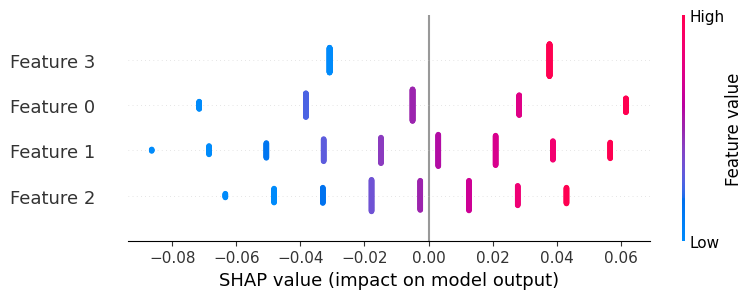

In [35]:
explainer = shap.Explainer(clf, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

## Xgboost Regression

In [36]:
import xgboost as xgb  # Importing xgboost library as xgb

clf = xgb.XGBRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("R-squared score (XGBoost classifier):", r2_score(y_test, y_pred))


R-squared score (XGBoost classifier): 0.587070340526228


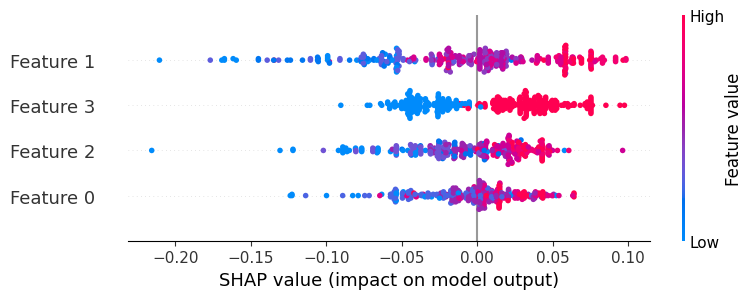

In [37]:
explainer = shap.Explainer(clf, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

# Statsmodels Regression

In [38]:

from statsmodels.regression import linear_model
from statsmodels.api import add_constant

# Add a constant to the independent variable matrix
X_train_with_const = add_constant(X_train)

# Fit the OLS model
model = linear_model.OLS(y_train, X_train_with_const)
results = model.fit()

# Print the summary of the regression results
print("Summary:")
print(results.summary())


Summary:
                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     138.6
Date:                Fri, 10 May 2024   Prob (F-statistic):           1.74e-70
Time:                        18:00:19   Log-Likelihood:                 360.55
No. Observations:                 350   AIC:                            -711.1
Df Residuals:                     345   BIC:                            -691.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7246      0.005    155.778

# Neural Net

## Neural Network Parameters

In [39]:
activation = 'relu'
epoch = 10
num_nodes = [2,4]
dropout_prob = [0.05,0.1]
lr = [0.01,0.1]
batch_size = [2,4]

In [40]:

myNN = aka_nn(X_train, X_test, y_train, y_test,activation)
model,scre =myNN.DNN(epoch,num_nodes,dropout_prob,lr,batch_size)


2 nodes, dropout 0.05, lr 0.01, batch size 2
5/5 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.0000e+00
2 nodes, dropout 0.05, lr 0.01, batch size 4
5/5 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.0000e+00
2 nodes, dropout 0.05, lr 0.1, batch size 2
5/5 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.0000e+00
2 nodes, dropout 0.05, lr 0.1, batch size 4
5/5 [==============================] - 0s 4ms/step - loss: 0.0123 - accuracy: 0.0000e+00
2 nodes, dropout 0.1, lr 0.01, batch size 2
5/5 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.0000e+00
2 nodes, dropout 0.1, lr 0.01, batch size 4
5/5 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.0000e+00
2 nodes, dropout 0.1, lr 0.1, batch size 2
5/5 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.0000e+00
2 nodes, dropout 0.1, lr 0.1, batch size 4
5/5 [====================

In [41]:
y_pred = model.predict(X_test)
print("R-squared score (DNN):", r2_score(y_test, y_pred))

5/5 [==============================] - 0s 2ms/step
R-squared score (DNN): 0.6481159403276122


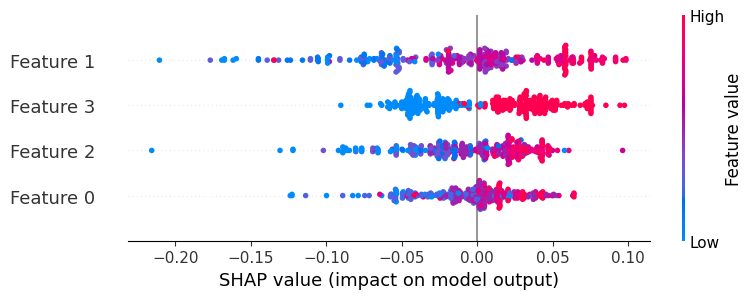

In [42]:
explainer = shap.Explainer(clf, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)